In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import pickle
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, f1_score

from tensorflow import keras
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


In [ ]:
#load dataset
data = pd.read_excel('Book1.xlsx', sheet_name='Sheet4') #data train

#read dataset
data

X1        X2     X3    X4    X5     X6     X7    X8     X9    X10  \
0    99132  0.501221  223.3  23.6  74.4  10872   7738  3954  14483  11793   
1    78564  0.498765  223.3  23.6  74.4  15819  13348  5793  20120   6016   
2    76239  0.501043  223.3  23.6  74.4  13096   9806  4735  15965   8039   
3    74078  0.501188  223.3  23.6  74.4   7599   6561  3673  13246   8479   
4   138788  0.510015  270.7  23.6  74.4  15525   5783  3640  11770  29541   
5    59698  0.500151   82.4  23.6  74.4   7990   6237  3004  11123   6640   
6   132811  0.505561  313.5  23.6  74.4  14532  13439  6083  20644  24042   
7    28917  0.498496  298.9  23.6  74.4   4489   3279  1749   5509   2322   
8   120900  0.501745  298.9  23.6  74.4  18700  10525  5885  17583  13585   
9   123467  0.507852    0.0  23.6  74.4   8878   7847  5760  15249  20070   
10   85639  0.507584  270.7  23.6  74.4   8606   4539  2716   8353  15527   
11  101022  0.500257  270.7  23.6  74.4  16201  11998  5627  19549  10866   
12   69783  0.498460  269.1  23.6  74.4  12574  10014  4963  16069   6720   
13  112903  0.502148  223.3  23.6  74.4  10555   7517  3650  13215  11878   
14   72791  0.506821    0.2  23.6  74.4   9405   5514  3193   9762   9698   
15   96008  0.503156  298.9  23.6  74.4  11980   9391  4844  17039  11255   
16   53622  0.507516  298.9  23.6  74.4   5607   3840  2113   7812   8311   
17   25101  0.508864   82.4  23.6  74.4   1484   1600   855   2868   3097   
18  114163  0.503193  269.3  23.6  74.4  17830  11784  6264  21594  11960   
19   40121  0.504898  269.3  23.6  74.4   5019   4267  1945   6570   4049   
20  130075  0.501465  269.3  23.6  74.4  18048  12021  6501  20145  16823   
21   71295  0.496627  231.7  23.6  74.4  14709  13387  5930  19987   4978   
22   70958  0.503890  313.5  23.6  74.4   6620   5960  2992  10036   9164   
23   39277  0.503399  313.5  23.6  74.4   4824   4513  1949   7152   2949   
24   83428  0.496931  223.3  23.6  74.4  14053  10367  4384  16381   8492   
25   80141  0.499682  231.7  23.6  74.4  12363   8543  4256  14923   7381   
26  101315  0.501584  231.7  23.6  74.4  14667  11039  5750  19925  13989   
27   76942  0.499727  231.7  23.6  74.4  10959   9190  4043  14594   8685   
28   37061  0.501228   53.0  23.6  74.4   4787   4354  2067   7949   3019   
29   86225  0.502244   13.6  23.6  74.4  10067   8421  4324  14967  10606   

    ...  X18    X19    X20   X21    X22    X23    X24    X25    X26  Y  
0   ...   75  10661   7286  3741  13586  11772  15208  35232  50440  1  
1   ...   75  15673  12563  5527  18683   5950   7666  22931  30597  2  
2   ...   75  12588   9120  4411  14837   8039   8779  20736  29515  2  
3   ...   75   7516   6416  3593  12829   8339  11115  26016  37131  1  
4   ...   75  15652   5225  3347  10605  29272  22631  34661  57292  1  
5   ...   75   7847   5832  2857  10429   6631   7632  18112  25744  2  
6   ...   75  10631   9278  4870  16662  24046  21636  34237  55873  0  
7   ...   75   4481   3071  1668   5150   2348   3083  10091  13174  2  
8   ...   75  18626   9495  5350  15734  13851  18742  41408  60150  2  
9   ...   75   8009   7034  5301  13303  20105  20081  37595  57676  1  
10  ...   75   8561   4256  2563   7761  15752  12722  23350  36072  1  
11  ...   75  15613  11111  5196  17718  10783  11282  28409  39691  2  
12  ...   75  12258   9126  4548  14512   6439   7781  23964  31745  2  
13  ...   75  10026   6799  3372  11940  11963  15774  37466  53240  1  
14  ...   75   9173   5104  2938   8979   9933  10473  22898  33371  1  
15  ...   75  11596   8760  4509  15801  11281  12419  32938  45357  1  
16  ...   75   5376   3621  2007   7393   8323   6324  17107  23431  2  
17  ...   75   1324   1434   758   2627   3120   3684   7948  11632  2  
18  ...   75  17631  11118  5982  20434  11970  13240  39762  53002  2  
19  ...   75   4812   3879  1764   5900   4011   5201   9846  15047  2  
20  ...   75  18243  11807  6414  19718  16711  18276  45353  63629  1  
21  ...   75  

#Preprocessing

In [ ]:
# mengecek missing values
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
Y      0
dtype: int64

In [ ]:
data.dropna()

X1        X2     X3    X4    X5     X6     X7    X8     X9    X10  \
0    99132  0.501221  223.3  23.6  74.4  10872   7738  3954  14483  11793   
1    78564  0.498765  223.3  23.6  74.4  15819  13348  5793  20120   6016   
2    76239  0.501043  223.3  23.6  74.4  13096   9806  4735  15965   8039   
3    74078  0.501188  223.3  23.6  74.4   7599   6561  3673  13246   8479   
4   138788  0.510015  270.7  23.6  74.4  15525   5783  3640  11770  29541   
5    59698  0.500151   82.4  23.6  74.4   7990   6237  3004  11123   6640   
6   132811  0.505561  313.5  23.6  74.4  14532  13439  6083  20644  24042   
7    28917  0.498496  298.9  23.6  74.4   4489   3279  1749   5509   2322   
8   120900  0.501745  298.9  23.6  74.4  18700  10525  5885  17583  13585   
9   123467  0.507852    0.0  23.6  74.4   8878   7847  5760  15249  20070   
10   85639  0.507584  270.7  23.6  74.4   8606   4539  2716   8353  15527   
11  101022  0.500257  270.7  23.6  74.4  16201  11998  5627  19549  10866   
12   69783  0.498460  269.1  23.6  74.4  12574  10014  4963  16069   6720   
13  112903  0.502148  223.3  23.6  74.4  10555   7517  3650  13215  11878   
14   72791  0.506821    0.2  23.6  74.4   9405   5514  3193   9762   9698   
15   96008  0.503156  298.9  23.6  74.4  11980   9391  4844  17039  11255   
16   53622  0.507516  298.9  23.6  74.4   5607   3840  2113   7812   8311   
17   25101  0.508864   82.4  23.6  74.4   1484   1600   855   2868   3097   
18  114163  0.503193  269.3  23.6  74.4  17830  11784  6264  21594  11960   
19   40121  0.504898  269.3  23.6  74.4   5019   4267  1945   6570   4049   
20  130075  0.501465  269.3  23.6  74.4  18048  12021  6501  20145  16823   
21   71295  0.496627  231.7  23.6  74.4  14709  13387  5930  19987   4978   
22   70958  0.503890  313.5  23.6  74.4   6620   5960  2992  10036   9164   
23   39277  0.503399  313.5  23.6  74.4   4824   4513  1949   7152   2949   
24   83428  0.496931  223.3  23.6  74.4  14053  10367  4384  16381   8492   
25   80141  0.499682  231.7  23.6  74.4  12363   8543  4256  14923   7381   
26  101315  0.501584  231.7  23.6  74.4  14667  11039  5750  19925  13989   
27   76942  0.499727  231.7  23.6  74.4  10959   9190  4043  14594   8685   
28   37061  0.501228   53.0  23.6  74.4   4787   4354  2067   7949   3019   
29   86225  0.502244   13.6  23.6  74.4  10067   8421  4324  14967  10606   

    ...  X18    X19    X20   X21    X22    X23    X24    X25    X26  Y  
0   ...   75  10661   7286  3741  13586  11772  15208  35232  50440  1  
1   ...   75  15673  12563  5527  18683   5950   7666  22931  30597  2  
2   ...   75  12588   9120  4411  14837   8039   8779  20736  29515  2  
3   ...   75   7516   6416  3593  12829   8339  11115  26016  37131  1  
4   ...   75  15652   5225  3347  10605  29272  22631  34661  57292  1  
5   ...   75   7847   5832  2857  10429   6631   7632  18112  25744  2  
6   ...   75  10631   9278  4870  16662  24046  21636  34237  55873  0  
7   ...   75   4481   3071  1668   5150   2348   3083  10091  13174  2  
8   ...   75  18626   9495  5350  15734  13851  18742  41408  60150  2  
9   ...   75   8009   7034  5301  13303  20105  20081  37595  57676  1  
10  ...   75   8561   4256  2563   7761  15752  12722  23350  36072  1  
11  ...   75  15613  11111  5196  17718  10783  11282  28409  39691  2  
12  ...   75  12258   9126  4548  14512   6439   7781  23964  31745  2  
13  ...   75  10026   6799  3372  11940  11963  15774  37466  53240  1  
14  ...   75   9173   5104  2938   8979   9933  10473  22898  33371  1  
15  ...   75  11596   8760  4509  15801  11281  12419  32938  45357  1  
16  ...   75   5376   3621  2007   7393   8323   6324  17107  23431  2  
17  ...   75   1324   1434   758   2627   3120   3684   7948  11632  2  
18  ...   75  17631  11118  5982  20434  11970  13240  39762  53002  2  
19  ...   75   4812   3879  1764   5900   4011   5201   9846  15047  2  
20  ...   75  18243  11807  6414  19718  16711  18276  45353  63629  1  
21  ...   75  

In [ ]:
# menampilkan nilai korelasi atribut terhadap target
corr = data.corr()
correlation = (pd.DataFrame(corr.Y))
correlation.sort_values(by='Y', ascending=False).style.background_gradient(cmap='coolwarm_r')

2    19
1    10
0     1
Name: Y, dtype: int64


<Axes: xlabel='Y', ylabel='count'>

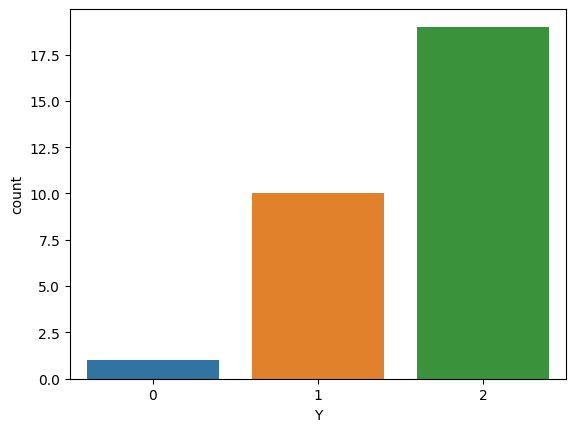

In [ ]:
# menampilkan persebaran label class
print(data['Y'].value_counts())

# plot persebaran label class
sns.countplot(data=data, x='Y')

In [ ]:
# menampilkan statistik dataset
data.describe()

X1         X2          X3            X4            X5  \
count      30.000000  30.000000   30.000000  3.000000e+01  3.000000e+01   
mean    82682.133333   0.502524  217.446667  2.360000e+01  7.440000e+01   
std     31154.681323   0.003532   97.207239  7.226896e-15  1.445379e-14   
min     25101.000000   0.496627    0.000000  2.360000e+01  7.440000e+01   
25%     70076.750000   0.500177  223.300000  2.360000e+01  7.440000e+01   
50%     79352.500000   0.501665  231.700000  2.360000e+01  7.440000e+01   
75%    101241.750000   0.504646  270.700000  2.360000e+01  7.440000e+01   
max    138788.000000   0.510015  313.500000  2.360000e+01  7.440000e+01   

                 X6            X7           X8            X9           X10  \
count     30.000000     30.000000    30.000000     30.000000     30.000000   
mean   10928.600000   8094.066667  4088.066667  13819.400000  10332.466667   
std     4598.057585   3313.737497  1582.674557   5154.941303   6216.029627   
min     1484.000000   1600.000000   855.000000   2868.000000   2322.000000   
25%     7696.750000   5581.250000  2995.000000   9830.500000   6660.000000   
50%    10915.500000   8134.000000  4149.500000  14758.500000   8924.500000   
75%    14633.250000  10485.500000  5719.250000  17447.000000  11939.500000   
max    18700.000000  13439.000000  6501.000000  21594.000000  29541.000000   

       ...   X18           X19           X20          X21           X22  \
count  ...  30.0     30.000000     30.000000    30.000000     30.000000   
mean   ...  75.0  10601.900000   7416.133333  3815.033333  12754.966667   
std    ...   0.0   4597.430499   3093.247192  1482.365711   4746.381362   
min    ...  75.0   1324.000000   1434.000000   758.000000   2627.000000   
25%    ...  75.0   7598.750000   4497.250000  2743.000000   9021.750000   
50%    ...  75.0  10646.000000   7658.500000  3995.000000  13797.000000   
75%    ...  75.0  14221.250000   9440.750000  5114.500000  15784.250000   
max    ...  75.0  18626.000000  13096.000000  6414.000000  20434.000000   

                X23           X24           X25           X26          Y  
count     30.000000     30.000000     30.000000     30.000000  30.000000  
mean   10325.100000  11081.600000  25682.133333  36763.733333   1.600000  
std     6209.809789   5353.919973   9822.898897  14765.701508   0.563242  
min     2348.000000   3083.000000   7948.000000  11632.000000   0.000000  
25%     6487.000000   7640.500000  20821.250000  29686.500000   1.000000  
50%     8918.500000  10226.500000  23657.000000  34721.500000   2.000000  
75%    11968.250000  13335.250000  33912.250000  49169.250000   2.000000  
max    29272.000000  22631.000000  45353.000000  63629.000000   2.000000  

[8 rows x 27 columns]

In [ ]:
# copy dataset train
X = data.copy()

y = X['Y'] #data target
X.drop(columns=['Y'], inplace = True) #feature

# menampilkan data
X.head()

X1        X2     X3    X4    X5     X6     X7    X8     X9    X10  ...  \
0   99132  0.501221  223.3  23.6  74.4  10872   7738  3954  14483  11793  ...   
1   78564  0.498765  223.3  23.6  74.4  15819  13348  5793  20120   6016  ...   
2   76239  0.501043  223.3  23.6  74.4  13096   9806  4735  15965   8039  ...   
3   74078  0.501188  223.3  23.6  74.4   7599   6561  3673  13246   8479  ...   
4  138788  0.510015  270.7  23.6  74.4  15525   5783  3640  11770  29541  ...   

    X17  X18    X19    X20   X21    X22    X23    X24    X25    X26  
0  23.5   75  10661   7286  3741  13586  11772  15208  35232  50440  
1  23.5   75  15673  12563  5527  18683   5950   7666  22931  30597  
2  23.5   75  12588   9120  4411  14837   8039   8779  20736  29515  
3  23.5   75   7516   6416  3593  12829   8339  11115  26016  37131  
4  23.5   75  15652   5225  3347  10605  29272  22631  34661  57292  

[5 rows x 26 columns]

#Pemodelan

In [ ]:
# Membagi data kedalam 10 folds.
# Lalu menggunakan variabel 'kf'(StratiFiedKFold splitting stratergy) sebagai input ke fungsi cross_val_score()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

i = 1
# metode split() menghasilkan indeks untuk membagi data menjadi set pelatihan dan pengujian.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{i}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    i+=1


Fold:1, Train set: 27, Test set:3
Fold:2, Train set: 27, Test set:3
Fold:3, Train set: 27, Test set:3
Fold:4, Train set: 27, Test set:3
Fold:5, Train set: 27, Test set:3
Fold:6, Train set: 27, Test set:3
Fold:7, Train set: 27, Test set:3
Fold:8, Train set: 27, Test set:3
Fold:9, Train set: 27, Test set:3
Fold:10, Train set: 27, Test set:3


##Feature Selection with SelectKBest

In [ ]:
# Pemilihan fitur yang paling penting menggunakan SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

X_new = X
y = y

selector = SelectKBest(f_classif, k=26)
selector.fit(X_new, y)

X_fs = selector.transform(X_new)
print("The 39 most important features are:", X_new.columns[selector.get_support(indices=True)])

The 39 most important features are: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26'],
      dtype='object')


In [ ]:
# menyimpan hasil skoring dan hasil fitur terbaik kedalam variabel lalu mengubahnya kedalam dataframe
df_scores = pd.DataFrame(selector.scores_)
df_best_feat = pd.DataFrame(X_new.columns)

In [ ]:
# menggabungkan 2 data frame skoring dan fitur terbaik
feature_scores = pd.concat([df_best_feat, df_scores],axis=1)
feature_scores.columns = ['Feature','Score']  # memberikan nama pada kolom dataframe
feature_scores

Feature      Score
0       X1   6.262323
1       X2   2.335012
2       X3   0.624813
3       X4  -0.000000
4       X5 -27.000000
5       X6   0.421062
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
9      X10  10.410972
10     X11   9.414617
11     X12   5.424428
12     X13   6.915008
13     X14   6.412979
14     X15   1.753016
15     X16   4.500000
16     X17        NaN
17     X18        NaN
18     X19   0.118305
19     X20   0.228128
20     X21   0.395523
21     X22   0.358000
22     X23  10.635550
23     X24  10.987074
24     X25   5.545927
25     X26   7.445268

#Eksperimen

##Kombinasi 3 Fitur

In [ ]:
print(feature_scores.nlargest(3,'Score'))  #print 3 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972


In [ ]:
# mengambil 3 fitur terbaik
X3 = X[['X24', 'X23', 'X10']]
X3.head()

X24    X23    X10
0  15208  11772  11793
1   7666   5950   6016
2   8779   8039   8039
3  11115   8339   8479
4  22631  29272  29541

In [ ]:
scaler = MinMaxScaler()
X3_normalized = scaler.fit_transform(X3)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score3RF = cross_val_score(RandomForestClassifier(n_estimators= count, min_samples_split=12,
                                                    random_state= 42), X3_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score3RF .mean())}')
print('Standard Deviation %0.4f' % (score3RF .std()))

Average score(100): 0.7667
Average score(200): 0.7667
Average score(300): 0.7667
Average score(400): 0.7667
Average score(500): 0.7667
Standard Deviation 0.2134


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores3NB = cross_val_score(nb_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3NB.mean())}')
print('Standard Deviation %0.4f' % (scores3NB.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.7000
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.6000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores3SVM = cross_val_score(svm_classifier, X3_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores3SVM .mean())}')
print('Standard Deviation %0.4f' % (scores3SVM .std()))

Average score: 0.6667
Standard Deviation 0.1491


In [ ]:
# Build and evaluate models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X3_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy3DNN = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy3DNN )}')


Epoch 1/50
1/1 - 1s - loss: 1.2179 - accuracy: 0.0000e+00 - val_loss: 1.1274 - val_accuracy: 0.3333 - 989ms/epoch - 989ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1773 - accuracy: 0.1905 - val_loss: 1.1409 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1400 - accuracy: 0.1905 - val_loss: 1.1603 - val_accuracy: 0.0000e+00 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 1.1041 - accuracy: 0.1905 - val_loss: 1.1863 - val_accuracy: 0.0000e+00 - 35ms/epoch - 35ms/step
Epoch 5/50
1/1 - 0s - loss: 1.0697 - accuracy: 0.2381 - val_loss: 1.2138 - val_accuracy: 0.0000e+00 - 27ms/epoch - 27ms/step
Epoch 6/50
1/1 - 0s - loss: 1.0379 - accuracy: 0.3333 - val_loss: 1.2449 - val_accuracy: 0.0000e+00 - 28ms/epoch - 28ms/step
Epoch 7/50
1/1 - 0s - loss: 1.0090 - accuracy: 0.4286 - val_loss: 1.2783 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 8/50
1/1 - 0s - loss: 0.9822 - accuracy: 0.7143 - val_loss: 1.3157 - val_accuracy: 0.3333 - 39ms/epoch - 39ms/step
Epoch 9/50

##Kombinasi 4 Fitur

In [ ]:
print(feature_scores.nlargest(4,'Score'))  #print 4 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617


In [ ]:
# mengambil 4 fitur terbaik
X4 = X[['X24','X23', 'X10', 'X11']]
X4.head()

X24    X23    X10    X11
0  15208  11772  11793  15320
1   7666   5950   6016   7934
2   8779   8039   8039   9192
3  11115   8339   8479  11232
4  22631  29272  29541  23064

In [ ]:
scaler = MinMaxScaler()
X4_normalized = scaler.fit_transform(X4)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score4RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X4_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score4RF .mean())}')
print('Standard Deviation %0.4f' % (score4RF .std()))

Average score(100): 0.6667
Average score(200): 0.6000
Average score(300): 0.6000
Average score(400): 0.6000
Average score(500): 0.6333
Standard Deviation 0.2769


In [ ]:

# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores4NB = cross_val_score(nb_classifier, X4_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4NB .mean())}')
print('Standard Deviation %0.4f' % (scores4NB .std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1 ,random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier, X4_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1 ,random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier, X4_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.6000
Standard Deviation 0.1333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1 ,random_state=0)


# Perform cross-validation
scores4SVM = cross_val_score(svm_classifier, X4_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores4SVM .mean())}')
print('Standard Deviation %0.4f' % (scores4SVM .std()))

Average score: 0.6333
Standard Deviation 0.2333


In [ ]:


# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X4_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy4DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy4DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.2099 - accuracy: 0.0952 - val_loss: 0.9589 - val_accuracy: 0.6667 - 944ms/epoch - 944ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1626 - accuracy: 0.0952 - val_loss: 0.9779 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1222 - accuracy: 0.0952 - val_loss: 1.0016 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0860 - accuracy: 0.2857 - val_loss: 1.0292 - val_accuracy: 0.3333 - 37ms/epoch - 37ms/step
Epoch 5/50
1/1 - 0s - loss: 1.0529 - accuracy: 0.7619 - val_loss: 1.0616 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 1.0227 - accuracy: 0.8095 - val_loss: 1.0997 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 7/50
1/1 - 0s - loss: 0.9951 - accuracy: 0.7619 - val_loss: 1.1395 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 8/50
1/1 - 0s - loss: 0.9705 - accuracy: 0.7619 - val_loss: 1.1789 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 5 Fitur

In [ ]:
print(feature_scores.nlargest(5,'Score'))  #print 5 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268


In [ ]:
# mengambil 5 fitur terbaik
X5 = X[['X24','X23', 'X10', 'X11' ,'X26']]
X5.head()

X24    X23    X10    X11    X26
0  15208  11772  11793  15320  50440
1   7666   5950   6016   7934  30597
2   8779   8039   8039   9192  29515
3  11115   8339   8479  11232  37131
4  22631  29272  29541  23064  57292

In [ ]:
scaler = MinMaxScaler()
X5_normalized = scaler.fit_transform(X5)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score5RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X5_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score5RF .mean())}')
print('Standard Deviation %0.4f' % (score5RF .std()))

Average score(100): 0.5667
Average score(200): 0.6000
Average score(300): 0.5667
Average score(400): 0.6000
Average score(500): 0.5667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores5NB = cross_val_score(nb_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5NB.mean())}')
print('Standard Deviation %0.4f' % (scores5NB.std()))

Average score: 0.7667
Standard Deviation 0.2134


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.7000
Standard Deviation 0.1795


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores5SVM = cross_val_score(svm_classifier, X5_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores5SVM.mean())}')
print('Standard Deviation %0.4f' % (scores5SVM.std()))

Average score: 0.6667
Standard Deviation 0.2582


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X5_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy5DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy5DNN)}')




Epoch 1/50
1/1 - 1s - loss: 1.0457 - accuracy: 0.4286 - val_loss: 1.3428 - val_accuracy: 0.3333 - 733ms/epoch - 733ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0031 - accuracy: 0.7143 - val_loss: 1.3732 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9635 - accuracy: 0.7143 - val_loss: 1.4122 - val_accuracy: 0.3333 - 55ms/epoch - 55ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9270 - accuracy: 0.7143 - val_loss: 1.4568 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8937 - accuracy: 0.7143 - val_loss: 1.5043 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8625 - accuracy: 0.7143 - val_loss: 1.5512 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8328 - accuracy: 0.7143 - val_loss: 1.6005 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8046 - accuracy: 0.7143 - val_loss: 1.6522 - val_accuracy: 0.3333 - 32ms/epoch - 32ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 6 Fitur

In [ ]:
print(feature_scores.nlargest(6,'Score'))  #print 6 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008


In [ ]:
# mengambil 6 fitur terbaik
X6 = X[['X24','X23', 'X10', 'X11' ,'X26','X13']]
X6.head()

X24    X23    X10    X11    X26    X13
0  15208  11772  11793  15320  50440  50960
1   7666   5950   6016   7934  30597  31036
2   8779   8039   8039   9192  29515  30952
3  11115   8339   8479  11232  37131  37485
4  22631  29272  29541  23064  57292  58713

In [ ]:
scaler = MinMaxScaler()
X6_normalized = scaler.fit_transform(X6)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score6RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X6_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score6RF .mean())}')
print('Standard Deviation %0.4f' % (score6RF .std()))

Average score(100): 0.6333
Average score(200): 0.6000
Average score(300): 0.6333
Average score(400): 0.6333
Average score(500): 0.6333
Standard Deviation 0.3145


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores6NB = cross_val_score(nb_classifier,X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6NB.mean())}')
print('Standard Deviation %0.4f' % (scores6NB.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores6SVM = cross_val_score(svm_classifier, X6_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores6SVM.mean())}')
print('Standard Deviation %0.4f' % (scores6SVM.std()))

Average score: 0.7000
Standard Deviation 0.2769


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X6_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy6DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy6DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.2326 - accuracy: 0.1429 - val_loss: 1.1434 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1586 - accuracy: 0.3333 - val_loss: 1.1280 - val_accuracy: 0.0000e+00 - 45ms/epoch - 45ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0904 - accuracy: 0.3810 - val_loss: 1.1148 - val_accuracy: 0.3333 - 47ms/epoch - 47ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0295 - accuracy: 0.7619 - val_loss: 1.1135 - val_accuracy: 0.3333 - 46ms/epoch - 46ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9756 - accuracy: 0.7619 - val_loss: 1.1194 - val_accuracy: 0.3333 - 59ms/epoch - 59ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9270 - accuracy: 0.7143 - val_loss: 1.1353 - val_accuracy: 0.3333 - 41ms/epoch - 41ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8827 - accuracy: 0.8095 - val_loss: 1.1579 - val_accuracy: 0.3333 - 54ms/epoch - 54ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8428 - accuracy: 0.7619 - val_loss: 1.1814 - val_accuracy: 0.3333 - 38ms/epoch - 38ms/step
Epoch 9/50
1/1 - 0s - loss: 0.80

##Kombinasi 7 Fitur

In [ ]:
print(feature_scores.nlargest(7,'Score'))  #print 7 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979


In [ ]:
# mengambil 7 fitur terbaik
X7 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14']]
X7.head()

X24    X23    X10    X11    X26    X13     X14
0  15208  11772  11793  15320  50440  50960   98790
1   7666   5950   6016   7934  30597  31036   77490
2   8779   8039   8039   9192  29515  30952   74780
3  11115   8339   8479  11232  37131  37485   73696
4  22631  29272  29541  23064  57292  58713  137077

In [ ]:
scaler = MinMaxScaler()
X7_normalized = scaler.fit_transform(X7)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score7RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42),X7_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score7RF .mean())}')
print('Standard Deviation %0.4f' % (score7RF .std()))

Average score(100): 0.6667
Average score(200): 0.6000
Average score(300): 0.6000
Average score(400): 0.6000
Average score(500): 0.6000
Standard Deviation 0.3266


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores7NB = cross_val_score(nb_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7NB.mean())}')
print('Standard Deviation %0.4f' % (scores7NB.std()))

Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores7SVM = cross_val_score(svm_classifier, X7_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores7SVM.mean())}')
print('Standard Deviation %0.4f' % (scores7SVM.std()))

Average score: 0.6667
Standard Deviation 0.2582


In [ ]:


# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X7_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy7DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy7DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.1063 - accuracy: 0.3333 - val_loss: 1.2439 - val_accuracy: 0.3333 - 748ms/epoch - 748ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0422 - accuracy: 0.2857 - val_loss: 1.2644 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9852 - accuracy: 0.5714 - val_loss: 1.2917 - val_accuracy: 0.3333 - 49ms/epoch - 49ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9324 - accuracy: 0.7143 - val_loss: 1.3260 - val_accuracy: 0.3333 - 44ms/epoch - 44ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8841 - accuracy: 0.7143 - val_loss: 1.3689 - val_accuracy: 0.3333 - 43ms/epoch - 43ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8406 - accuracy: 0.7143 - val_loss: 1.4182 - val_accuracy: 0.3333 - 61ms/epoch - 61ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8015 - accuracy: 0.7619 - val_loss: 1.4724 - val_accuracy: 0.3333 - 39ms/epoch - 39ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7658 - accuracy: 0.7619 - val_loss: 1.5327 - val_accuracy: 0.3333 - 41ms/epoch - 41ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

1/1 [==============================] - 0s 83ms/step
Accuracy: 0.6667


##Kombinasi 8 Fitur

In [ ]:
print(feature_scores.nlargest(8,'Score'))  #print 8 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323


In [ ]:
# mengambil 8 fitur terbaik
X8 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1']]
X8.head()

X24    X23    X10    X11    X26    X13     X14      X1
0  15208  11772  11793  15320  50440  50960   98790   99132
1   7666   5950   6016   7934  30597  31036   77490   78564
2   8779   8039   8039   9192  29515  30952   74780   76239
3  11115   8339   8479  11232  37131  37485   73696   74078
4  22631  29272  29541  23064  57292  58713  137077  138788

In [ ]:
scaler = MinMaxScaler()
X8_normalized = scaler.fit_transform(X8)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score8RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X8_normalized , y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score8RF .mean())}')
print('Standard Deviation %0.4f' % (score8RF .std()))

Average score(100): 0.6667
Average score(200): 0.7333
Average score(300): 0.6333
Average score(400): 0.6333
Average score(500): 0.6333
Standard Deviation 0.2769


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores8NB = cross_val_score(nb_classifier, X8_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8NB.mean())}')
print('Standard Deviation %0.4f' % (scores8NB.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier,X8_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier,X8_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores8SVM = cross_val_score(svm_classifier,X8_normalized , y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores8SVM.mean())}')
print('Standard Deviation %0.4f' % (scores8SVM.std()))

Average score: 0.6667
Standard Deviation 0.1491


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X8_normalized , y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy8DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy8DNN)}')


Epoch 1/50
1/1 - 1s - loss: 0.9950 - accuracy: 0.3333 - val_loss: 1.7623 - val_accuracy: 0.0000e+00 - 749ms/epoch - 749ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9401 - accuracy: 0.3810 - val_loss: 1.8475 - val_accuracy: 0.3333 - 32ms/epoch - 32ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8893 - accuracy: 0.6667 - val_loss: 1.9312 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8430 - accuracy: 0.7619 - val_loss: 2.0188 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8012 - accuracy: 0.7619 - val_loss: 2.1081 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7635 - accuracy: 0.7143 - val_loss: 2.1971 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7302 - accuracy: 0.7143 - val_loss: 2.2810 - val_accuracy: 0.3333 - 32ms/epoch - 32ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7005 - accuracy: 0.7143 - val_loss: 2.3622 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0s - loss

1/1 [==============================] - 0s 78ms/step
Accuracy: 0.6667


##Kombinasi 9 Fitur

In [ ]:
print(feature_scores.nlargest(9,'Score'))  #print 9 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927


In [ ]:
# mengambil 9 fitur terbaik
X9 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25']]
X9.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25
0  15208  11772  11793  15320  50440  50960   98790   99132  35232
1   7666   5950   6016   7934  30597  31036   77490   78564  22931
2   8779   8039   8039   9192  29515  30952   74780   76239  20736
3  11115   8339   8479  11232  37131  37485   73696   74078  26016
4  22631  29272  29541  23064  57292  58713  137077  138788  34661

In [ ]:
scaler = MinMaxScaler()
X9_normalized = scaler.fit_transform(X9)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score9RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X9_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score9RF .mean())}')
print('Standard Deviation %0.4f' % (score9RF .std()))

Average score(100): 0.6333
Average score(200): 0.6667
Average score(300): 0.6333
Average score(400): 0.6667
Average score(500): 0.6667
Standard Deviation 0.3333


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores9NB = cross_val_score(nb_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9NB.mean())}')
print('Standard Deviation %0.4f' % (scores9NB.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.7000
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores9SVM = cross_val_score(svm_classifier, X9_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores9SVM.mean())}')
print('Standard Deviation %0.4f' % (scores9SVM.std()))

Average score: 0.6667
Standard Deviation 0.2582


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X9_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy9DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy9DNN)}')

Epoch 1/50
1/1 - 1s - loss: 0.9947 - accuracy: 0.7619 - val_loss: 1.2273 - val_accuracy: 0.3333 - 775ms/epoch - 775ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9395 - accuracy: 0.7143 - val_loss: 1.3125 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8926 - accuracy: 0.7143 - val_loss: 1.3942 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8536 - accuracy: 0.7143 - val_loss: 1.4734 - val_accuracy: 0.3333 - 37ms/epoch - 37ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8181 - accuracy: 0.7143 - val_loss: 1.5555 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7843 - accuracy: 0.7143 - val_loss: 1.6411 - val_accuracy: 0.3333 - 49ms/epoch - 49ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7529 - accuracy: 0.7143 - val_loss: 1.7263 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7240 - accuracy: 0.7143 - val_loss: 1.8073 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 10 Fitur

In [ ]:
print(feature_scores.nlargest(10,'Score'))  #print 10 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428


In [ ]:
# mengambil 10 fitur terbaik
X10 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12']]
X10.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649

In [ ]:
scaler = MinMaxScaler()
X10_normalized = scaler.fit_transform(X10)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score10RF = cross_val_score(RandomForestClassifier(n_estimators= count, min_samples_split=8,
                                                     random_state= 42), X10_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score10RF.mean())}')
print('Standard Deviation %0.4f' % (score10RF.std()))

Average score(100): 0.6333
Average score(200): 0.6333
Average score(300): 0.6333
Average score(400): 0.6333
Average score(500): 0.6333
Standard Deviation 0.2769


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores10NB = cross_val_score(nb_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10NB.mean())}')
print('Standard Deviation %0.4f' % (scores10NB.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.7000
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores10SVM = cross_val_score(svm_classifier, X10_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores10SVM.mean())}')
print('Standard Deviation %0.4f' % (scores10SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X10_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy10DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy10DNN)}')

Epoch 1/50
1/1 - 1s - loss: 0.9559 - accuracy: 0.7619 - val_loss: 1.1404 - val_accuracy: 0.3333 - 768ms/epoch - 768ms/step
Epoch 2/50
1/1 - 0s - loss: 0.8905 - accuracy: 0.7619 - val_loss: 1.1656 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8321 - accuracy: 0.7619 - val_loss: 1.2104 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7817 - accuracy: 0.8095 - val_loss: 1.2740 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7379 - accuracy: 0.8095 - val_loss: 1.3496 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6996 - accuracy: 0.8095 - val_loss: 1.4307 - val_accuracy: 0.3333 - 38ms/epoch - 38ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6663 - accuracy: 0.7619 - val_loss: 1.5176 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6366 - accuracy: 0.7619 - val_loss: 1.6085 - val_accuracy: 0.3333 - 50ms/epoch - 50ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 11 Fitur

In [ ]:
print(feature_scores.nlargest(11,'Score'))  #print 11 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000


In [ ]:
# mengambil 11 fitur terbaik
X11 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16']]
X11.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16  
0  179.3  
1  179.3  
2  179.3  
3  179.3  
4  179.3

In [ ]:
scaler = MinMaxScaler()
X11_normalized = scaler.fit_transform(X11)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score11RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X11_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score11RF .mean())}')
print('Standard Deviation %0.4f' % (score11RF .std()))

Average score(100): 0.6667
Average score(200): 0.6667
Average score(300): 0.6667
Average score(400): 0.6667
Average score(500): 0.6667
Standard Deviation 0.3333


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores11NB= cross_val_score(nb_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11NB.mean())}')
print('Standard Deviation %0.4f' % (scores11NB.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.7000
Standard Deviation 0.1795


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.5667
Standard Deviation 0.1528


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores11SVM = cross_val_score(svm_classifier, X11_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores11SVM.mean())}')
print('Standard Deviation %0.4f' % (scores11SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X11_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy11DNN = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy11DNN)}')

Epoch 1/50
1/1 - 1s - loss: 1.1988 - accuracy: 0.0000e+00 - val_loss: 1.0098 - val_accuracy: 0.3333 - 739ms/epoch - 739ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1252 - accuracy: 0.1905 - val_loss: 1.0005 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0582 - accuracy: 0.5714 - val_loss: 1.0080 - val_accuracy: 0.3333 - 36ms/epoch - 36ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9990 - accuracy: 0.7143 - val_loss: 1.0311 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9466 - accuracy: 0.7143 - val_loss: 1.0687 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8999 - accuracy: 0.7619 - val_loss: 1.1161 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8596 - accuracy: 0.7143 - val_loss: 1.1689 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 8/50
1/1 - 0s - loss: 0.8230 - accuracy: 0.7143 - val_loss: 1.2231 - val_accuracy: 0.3333 - 41ms/epoch - 41ms/step
Epoch 9/50
1/1 - 0s - loss

##Kombinasi 12 Fitur

In [ ]:
print(feature_scores.nlargest(12,'Score'))  #print 12 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012


In [ ]:
# mengambil 12 fitur terbaik
X12 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2']]
X12.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2  
0  179.3  0.501221  
1  179.3  0.498765  
2  179.3  0.501043  
3  179.3  0.501188  
4  179.3  0.510015

In [ ]:
scaler = MinMaxScaler()
X12_normalized = scaler.fit_transform(X12)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score12RF = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X12_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score12RF .mean())}')
print('Standard Deviation %0.4f' % (score12RF .std()))

Average score(100): 0.6000
Average score(200): 0.5667
Average score(300): 0.6000
Average score(400): 0.6000
Average score(500): 0.5667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()


# Perform cross-validation
scores12NB = cross_val_score(nb_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12NB.mean())}')
print('Standard Deviation %0.4f' % (scores12NB.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.6667
Standard Deviation 0.2108


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)


# Perform cross-validation
scores12SVM = cross_val_score(svm_classifier, X12_normalized, y, cv=kf, scoring="accuracy")


# Display the results
print(f'Average score: {"{:.4f}".format(scores12SVM.mean())}')
print('Standard Deviation %0.4f' % (scores12SVM.std()))

Average score: 0.7000
Standard Deviation 0.1795


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X12_normalized, y, test_size=0.2, random_state=42)


# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy12 = accuracy_score(y_test, y_pred_classes)


# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy12)}')

Epoch 1/50
1/1 - 1s - loss: 1.2278 - accuracy: 0.1429 - val_loss: 0.9476 - val_accuracy: 0.6667 - 749ms/epoch - 749ms/step
Epoch 2/50
1/1 - 0s - loss: 1.1442 - accuracy: 0.1429 - val_loss: 0.9479 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0685 - accuracy: 0.3810 - val_loss: 0.9556 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0001 - accuracy: 0.5238 - val_loss: 0.9692 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9390 - accuracy: 0.5714 - val_loss: 0.9867 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8845 - accuracy: 0.6190 - val_loss: 1.0092 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8358 - accuracy: 0.7143 - val_loss: 1.0356 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7925 - accuracy: 0.7619 - val_loss: 1.0670 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 13 Fitur

In [ ]:
print(feature_scores.nlargest(13,'Score'))  #print 13 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016


In [ ]:
# mengambil 13 fitur terbaik
X13 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15']]
X13.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15  
0  179.3  0.501221  0.501528  
1  179.3  0.498765  0.500129  
2  179.3  0.501043  0.502126  
3  179.3  0.501188  0.500461  
4  179.3  0.510015  0.509962

In [ ]:
scaler = MinMaxScaler()
X13_normalized = scaler.fit_transform(X13)

In [ ]:
estimators = [100, 200, 300, 400, 500]
# rf = RandomForestClassifier()

for count in estimators:
    score13rf = cross_val_score(RandomForestClassifier(n_estimators= count, random_state= 42), X13_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score({count}): {"{:.4f}".format(score13rf.mean())}')
print('Standard Deviation %0.4f' % (score13rf.std()))

Average score(100): 0.5333
Average score(200): 0.5667
Average score(300): 0.5333
Average score(400): 0.5333
Average score(500): 0.5333
Standard Deviation 0.2667


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores13NB = cross_val_score(nb_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13NB.mean())}')
print('Standard Deviation %0.4f' % (scores13NB.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.6667
Standard Deviation 0.2108


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores13SVM = cross_val_score(svm_classifier, X13_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores13SVM.mean())}')
print('Standard Deviation %0.4f' % (scores13SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X13_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy13 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy13)}')


Epoch 1/50
1/1 - 1s - loss: 1.1431 - accuracy: 0.3810 - val_loss: 1.1605 - val_accuracy: 0.0000e+00 - 787ms/epoch - 787ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0539 - accuracy: 0.5714 - val_loss: 1.1450 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9742 - accuracy: 0.7143 - val_loss: 1.1382 - val_accuracy: 0.6667 - 32ms/epoch - 32ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9052 - accuracy: 0.8095 - val_loss: 1.1419 - val_accuracy: 0.6667 - 30ms/epoch - 30ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8448 - accuracy: 0.8095 - val_loss: 1.1572 - val_accuracy: 0.3333 - 26ms/epoch - 26ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7923 - accuracy: 0.8095 - val_loss: 1.1806 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7466 - accuracy: 0.8095 - val_loss: 1.2074 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7062 - accuracy: 0.8095 - val_loss: 1.2416 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 9/50
1/1 - 0s - loss

##Kombinasi 14 Fitur

In [ ]:
print(feature_scores.nlargest(14,'Score'))  #print 14 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156


In [ ]:
# mengambil 14 fitur terbaik
X14 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7']]
X14.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7  
0  179.3  0.501221  0.501528   7738  
1  179.3  0.498765  0.500129  13348  
2  179.3  0.501043  0.502126   9806  
3  179.3  0.501188  0.500461   6561  
4  179.3  0.510015  0.509962   5783

In [ ]:
scaler = MinMaxScaler()
X14_normalized = scaler.fit_transform(X14)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score14rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X14_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score14rf.mean())}')
    print('Standard Deviation %0.4f' % (score14rf.std()))


Average score (100): 0.6667
Standard Deviation 0.2981
Average score (200): 0.7000
Standard Deviation 0.3145
Average score (300): 0.7000
Standard Deviation 0.3145
Average score (400): 0.7000
Standard Deviation 0.3145
Average score (500): 0.7000
Standard Deviation 0.3145


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores14NB = cross_val_score(nb_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14NB.mean())}')
print('Standard Deviation %0.4f' % (scores14NB.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.7000
Standard Deviation 0.2333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores14SVM = cross_val_score(svm_classifier, X14_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores14SVM.mean())}')
print('Standard Deviation %0.4f' % (scores14SVM.std()))


Average score: 0.7000
Standard Deviation 0.2333


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X14_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy14 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy14)}')


Epoch 1/50
1/1 - 1s - loss: 1.4098 - accuracy: 0.1905 - val_loss: 1.2613 - val_accuracy: 0.3333 - 770ms/epoch - 770ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2888 - accuracy: 0.2857 - val_loss: 1.2737 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 1.1797 - accuracy: 0.3333 - val_loss: 1.2979 - val_accuracy: 0.3333 - 32ms/epoch - 32ms/step
Epoch 4/50
1/1 - 0s - loss: 1.0798 - accuracy: 0.3810 - val_loss: 1.3312 - val_accuracy: 0.6667 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9905 - accuracy: 0.4286 - val_loss: 1.3739 - val_accuracy: 0.6667 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.9128 - accuracy: 0.5238 - val_loss: 1.4252 - val_accuracy: 0.6667 - 29ms/epoch - 29ms/step
Epoch 7/50
1/1 - 0s - loss: 0.8458 - accuracy: 0.6667 - val_loss: 1.4814 - val_accuracy: 0.3333 - 52ms/epoch - 52ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7873 - accuracy: 0.7619 - val_loss: 1.5392 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 15 Fitur

In [ ]:
print(feature_scores.nlargest(15,'Score'))  #print 15 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002


In [ ]:
# mengambil 15 fitur terbaik
X15 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8']]
X15.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7    X8  
0  179.3  0.501221  0.501528   7738  3954  
1  179.3  0.498765  0.500129  13348  5793  
2  179.3  0.501043  0.502126   9806  4735  
3  179.3  0.501188  0.500461   6561  3673  
4  179.3  0.510015  0.509962   5783  3640

In [ ]:
scaler = MinMaxScaler()
X15_normalized = scaler.fit_transform(X15)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score15rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X15_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score15rf.mean())}')
    print('Standard Deviation %0.4f' % (score15rf.std()))


Average score (100): 0.7000
Standard Deviation 0.3145
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores15NB = cross_val_score(nb_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15NB.mean())}')
print('Standard Deviation %0.4f' % (scores15NB.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))

Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))

Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores15SVM = cross_val_score(svm_classifier, X15_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores15SVM.mean())}')
print('Standard Deviation %0.4f' % (scores15SVM.std()))

Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X15_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy15 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy15)}')


Epoch 1/50
1/1 - 1s - loss: 1.0208 - accuracy: 0.4286 - val_loss: 1.2521 - val_accuracy: 0.0000e+00 - 755ms/epoch - 755ms/step
Epoch 2/50
1/1 - 0s - loss: 0.9513 - accuracy: 0.5238 - val_loss: 1.2483 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8877 - accuracy: 0.5714 - val_loss: 1.2532 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8295 - accuracy: 0.6667 - val_loss: 1.2653 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7775 - accuracy: 0.7143 - val_loss: 1.2885 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7304 - accuracy: 0.7619 - val_loss: 1.3234 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6878 - accuracy: 0.7619 - val_loss: 1.3614 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6487 - accuracy: 0.7619 - val_loss: 1.4067 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 9/50
1/1 - 0s - loss

##Kombinasi 16 Fitur

In [ ]:
print(feature_scores.nlargest(16,'Score'))  #print 16 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076


In [ ]:
# mengambil 16 fitur terbaik
X16 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9']]
X16.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7    X8     X9  
0  179.3  0.501221  0.501528   7738  3954  14483  
1  179.3  0.498765  0.500129  13348  5793  20120  
2  179.3  0.501043  0.502126   9806  4735  15965  
3  179.3  0.501188  0.500461   6561  3673  13246  
4  179.3  0.510015  0.509962   5783  3640  11770

In [ ]:
scaler = MinMaxScaler()
X16_normalized = scaler.fit_transform(X16)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score16rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X16_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score16rf.mean())}')
    print('Standard Deviation %0.4f' % (score16rf.std()))


Average score (100): 0.7667
Standard Deviation 0.3000
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores16NB = cross_val_score(nb_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16NB.mean())}')
print('Standard Deviation %0.4f' % (scores16NB.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores16SVM = cross_val_score(svm_classifier, X16_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores16SVM.mean())}')
print('Standard Deviation %0.4f' % (scores16SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X16_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy16 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy16)}')


Epoch 1/50
1/1 - 1s - loss: 1.2534 - accuracy: 0.0476 - val_loss: 1.0453 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1504 - accuracy: 0.1905 - val_loss: 1.0541 - val_accuracy: 0.6667 - 38ms/epoch - 38ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0582 - accuracy: 0.4762 - val_loss: 1.0723 - val_accuracy: 0.3333 - 61ms/epoch - 61ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9763 - accuracy: 0.7143 - val_loss: 1.0986 - val_accuracy: 0.3333 - 56ms/epoch - 56ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9053 - accuracy: 0.8095 - val_loss: 1.1310 - val_accuracy: 0.3333 - 57ms/epoch - 57ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8435 - accuracy: 0.8095 - val_loss: 1.1665 - val_accuracy: 0.3333 - 40ms/epoch - 40ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7887 - accuracy: 0.8095 - val_loss: 1.2112 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7405 - accuracy: 0.8095 - val_loss: 1.2625 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 9/50
1/1 - 0s - loss: 0.6975 -

##Kombinasi 17 Fitur

In [ ]:
print(feature_scores.nlargest(17,'Score'))  #print 17 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813


In [ ]:
# mengambil 17 fitur terbaik
X17 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3']]
X17.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7    X8     X9     X3  
0  179.3  0.501221  0.501528   7738  3954  14483  223.3  
1  179.3  0.498765  0.500129  13348  5793  20120  223.3  
2  179.3  0.501043  0.502126   9806  4735  15965  223.3  
3  179.3  0.501188  0.500461   6561  3673  13246  223.3  
4  179.3  0.510015  0.509962   5783  3640  11770  270.7

In [ ]:
scaler = MinMaxScaler()
X17_normalized = scaler.fit_transform(X17)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score17rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X17_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score17rf.mean())}')
    print('Standard Deviation %0.4f' % (score17rf.std()))


Average score (100): 0.7333
Standard Deviation 0.2906
Average score (200): 0.7333
Standard Deviation 0.2906
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores17NB = cross_val_score(nb_classifier, X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17NB.mean())}')
print('Standard Deviation %0.4f' % (scores17NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier,X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier,X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.7000
Standard Deviation 0.2333


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores17SVM = cross_val_score(svm_classifier,X17_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores17SVM.mean())}')
print('Standard Deviation %0.4f' % (scores17SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X17_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy17 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy17)}')


Epoch 1/50
1/1 - 1s - loss: 1.2847 - accuracy: 0.1429 - val_loss: 1.3380 - val_accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.1759 - accuracy: 0.2857 - val_loss: 1.3280 - val_accuracy: 0.0000e+00 - 40ms/epoch - 40ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0767 - accuracy: 0.3810 - val_loss: 1.3329 - val_accuracy: 0.0000e+00 - 56ms/epoch - 56ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9883 - accuracy: 0.5238 - val_loss: 1.3545 - val_accuracy: 0.3333 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 0.9095 - accuracy: 0.6190 - val_loss: 1.3905 - val_accuracy: 0.6667 - 59ms/epoch - 59ms/step
Epoch 6/50
1/1 - 0s - loss: 0.8402 - accuracy: 0.7619 - val_loss: 1.4420 - val_accuracy: 0.6667 - 59ms/epoch - 59ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7786 - accuracy: 0.7619 - val_loss: 1.5086 - val_accuracy: 0.3333 - 58ms/epoch - 58ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7240 - accuracy: 0.8095 - val_loss: 1.5879 - val_accuracy: 0.3333 - 58ms/epoch - 58ms/step
Epoch 9/50
1/1 - 0s - lo

##Kombinasi 18 Fitur

In [ ]:
print(feature_scores.nlargest(18,'Score'))  #print 18 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062


In [ ]:
# mengambil 18 fitur terbaik
X18 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6']]
X18.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7    X8     X9     X3     X6  
0  179.3  0.501221  0.501528   7738  3954  14483  223.3  10872  
1  179.3  0.498765  0.500129  13348  5793  20120  223.3  15819  
2  179.3  0.501043  0.502126   9806  4735  15965  223.3  13096  
3  179.3  0.501188  0.500461   6561  3673  13246  223.3   7599  
4  179.3  0.510015  0.509962   5783  3640  11770  270.7  15525

In [ ]:
scaler = MinMaxScaler()
X18_normalized = scaler.fit_transform(X18)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score18rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X18_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score18rf.mean())}')
    print('Standard Deviation %0.4f' % (score18rf.std()))


Average score (100): 0.7333
Standard Deviation 0.2906
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores18NB = cross_val_score(nb_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18NB.mean())}')
print('Standard Deviation %0.4f' % (scores18NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores18SVM = cross_val_score(svm_classifier, X18_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores18SVM.mean())}')
print('Standard Deviation %0.4f' % (scores18SVM.std()))


Average score: 0.7333
Standard Deviation 0.2000


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X18_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy18 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy18)}')


Epoch 1/50
1/1 - 1s - loss: 1.1927 - accuracy: 0.3333 - val_loss: 1.3228 - val_accuracy: 0.3333 - 729ms/epoch - 729ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0756 - accuracy: 0.3333 - val_loss: 1.2879 - val_accuracy: 0.0000e+00 - 30ms/epoch - 30ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9706 - accuracy: 0.4762 - val_loss: 1.2725 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8786 - accuracy: 0.6190 - val_loss: 1.2728 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8008 - accuracy: 0.8571 - val_loss: 1.2896 - val_accuracy: 0.3333 - 37ms/epoch - 37ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7330 - accuracy: 0.8571 - val_loss: 1.3257 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6739 - accuracy: 0.8095 - val_loss: 1.3709 - val_accuracy: 0.3333 - 27ms/epoch - 27ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6220 - accuracy: 0.8095 - val_loss: 1.4230 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 9/50
1/1 - 0s - loss

##Kombinasi 19 Fitur

In [ ]:
print(feature_scores.nlargest(19,'Score'))  #print 19 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523


In [ ]:
# mengambil 19 fitur terbaik
X19 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21']]
X19.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7    X8     X9     X3     X6   X21  
0  179.3  0.501221  0.501528   7738  3954  14483  223.3  10872  3741  
1  179.3  0.498765  0.500129  13348  5793  20120  223.3  15819  5527  
2  179.3  0.501043  0.502126   9806  4735  15965  223.3  13096  4411  
3  179.3  0.501188  0.500461   6561  3673  13246  223.3   7599  3593  
4  179.3  0.510015  0.509962   5783  3640  11770  270.7  15525  3347

In [ ]:
scaler = MinMaxScaler()
X19_normalized = scaler.fit_transform(X19)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score19rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X19_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score19rf.mean())}')
    print('Standard Deviation %0.4f' % (score19rf.std()))


Average score (100): 0.7333
Standard Deviation 0.2906
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores19NB = cross_val_score(nb_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19NB.mean())}')
print('Standard Deviation %0.4f' % (scores19NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores19SVM = cross_val_score(svm_classifier, X19_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores19SVM.mean())}')
print('Standard Deviation %0.4f' % (scores19SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X19_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy19 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy19)}')


Epoch 1/50
1/1 - 1s - loss: 0.9449 - accuracy: 0.7619 - val_loss: 1.1407 - val_accuracy: 0.3333 - 760ms/epoch - 760ms/step
Epoch 2/50
1/1 - 0s - loss: 0.8713 - accuracy: 0.8571 - val_loss: 1.1768 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 3/50
1/1 - 0s - loss: 0.8051 - accuracy: 0.9048 - val_loss: 1.2193 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 4/50
1/1 - 0s - loss: 0.7457 - accuracy: 0.9048 - val_loss: 1.2697 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6922 - accuracy: 0.9048 - val_loss: 1.3246 - val_accuracy: 0.3333 - 27ms/epoch - 27ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6440 - accuracy: 0.9048 - val_loss: 1.3797 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6007 - accuracy: 0.9048 - val_loss: 1.4400 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5607 - accuracy: 0.9048 - val_loss: 1.5056 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 20 Fitur

In [ ]:
print(feature_scores.nlargest(20,'Score'))  #print 20 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000


In [ ]:
# mengambil 20 fitur terbaik
X20 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22']]
X20.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

     X16        X2       X15     X7    X8     X9     X3     X6   X21    X22  
0  179.3  0.501221  0.501528   7738  3954  14483  223.3  10872  3741  13586  
1  179.3  0.498765  0.500129  13348  5793  20120  223.3  15819  5527  18683  
2  179.3  0.501043  0.502126   9806  4735  15965  223.3  13096  4411  14837  
3  179.3  0.501188  0.500461   6561  3673  13246  223.3   7599  3593  12829  
4  179.3  0.510015  0.509962   5783  3640  11770  270.7  15525  3347  10605

In [ ]:
scaler = MinMaxScaler()
X20_normalized = scaler.fit_transform(X20)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score20rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X20_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score20rf.mean())}')
    print('Standard Deviation %0.4f' % (score20rf.std()))


Average score (100): 0.7333
Standard Deviation 0.2906
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores20NB = cross_val_score(nb_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20NB.mean())}')
print('Standard Deviation %0.4f' % (scores20NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores20SVM = cross_val_score(svm_classifier, X20_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores20SVM.mean())}')
print('Standard Deviation %0.4f' % (scores20SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X20_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy20 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy20)}')


Epoch 1/50
1/1 - 1s - loss: 1.1972 - accuracy: 0.1905 - val_loss: 1.5237 - val_accuracy: 0.0000e+00 - 811ms/epoch - 811ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0702 - accuracy: 0.2381 - val_loss: 1.5063 - val_accuracy: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9574 - accuracy: 0.5714 - val_loss: 1.5003 - val_accuracy: 0.0000e+00 - 37ms/epoch - 37ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8598 - accuracy: 0.7619 - val_loss: 1.5054 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7744 - accuracy: 0.7143 - val_loss: 1.5291 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7012 - accuracy: 0.8095 - val_loss: 1.5697 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6392 - accuracy: 0.8571 - val_loss: 1.6240 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5865 - accuracy: 0.8571 - val_loss: 1.6893 - val_accuracy: 0.3333 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0

##Kombinasi 21 Fitur

In [ ]:
print(feature_scores.nlargest(21,'Score'))  #print 21 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000
19     X20   0.228128


In [ ]:
# mengambil 21 fitur terbaik
X21 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22', 'X20']]
X21.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

   ...        X2       X15     X7    X8     X9     X3     X6   X21    X22  \
0  ...  0.501221  0.501528   7738  3954  14483  223.3  10872  3741  13586   
1  ...  0.498765  0.500129  13348  5793  20120  223.3  15819  5527  18683   
2  ...  0.501043  0.502126   9806  4735  15965  223.3  13096  4411  14837   
3  ...  0.501188  0.500461   6561  3673  13246  223.3   7599  3593  12829   
4  ...  0.510015  0.509962   5783  3640  11770  270.7  15525  3347  10605   

     X20  
0   7286  
1  12563  
2   9120  
3   6416  
4   5225  

[5 rows x 21 columns]

In [ ]:
scaler = MinMaxScaler()
X21_normalized = scaler.fit_transform(X21)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score21rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X21_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score21rf.mean())}')
    print('Standard Deviation %0.4f' % (score21rf.std()))


Average score (100): 0.7667
Standard Deviation 0.3000
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores21NB = cross_val_score(nb_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21NB.mean())}')
print('Standard Deviation %0.4f' % (scores21NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores21SVM = cross_val_score(svm_classifier, X21_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores21SVM.mean())}')
print('Standard Deviation %0.4f' % (scores21SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X21_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy21 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy21)}')


Epoch 1/50
1/1 - 1s - loss: 0.9405 - accuracy: 0.6667 - val_loss: 1.0152 - val_accuracy: 0.6667 - 791ms/epoch - 791ms/step
Epoch 2/50
1/1 - 0s - loss: 0.8410 - accuracy: 0.7619 - val_loss: 1.0465 - val_accuracy: 0.6667 - 31ms/epoch - 31ms/step
Epoch 3/50
1/1 - 0s - loss: 0.7577 - accuracy: 0.8095 - val_loss: 1.0887 - val_accuracy: 0.6667 - 29ms/epoch - 29ms/step
Epoch 4/50
1/1 - 0s - loss: 0.6894 - accuracy: 0.8571 - val_loss: 1.1363 - val_accuracy: 0.6667 - 27ms/epoch - 27ms/step
Epoch 5/50
1/1 - 0s - loss: 0.6319 - accuracy: 0.8571 - val_loss: 1.1913 - val_accuracy: 0.3333 - 27ms/epoch - 27ms/step
Epoch 6/50
1/1 - 0s - loss: 0.5824 - accuracy: 0.8571 - val_loss: 1.2523 - val_accuracy: 0.3333 - 27ms/epoch - 27ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5402 - accuracy: 0.8571 - val_loss: 1.3167 - val_accuracy: 0.3333 - 37ms/epoch - 37ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5034 - accuracy: 0.9048 - val_loss: 1.3826 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 22 Fitur

In [ ]:
print(feature_scores.nlargest(22,'Score'))  #print 22 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000
19     X20   0.228128
18     X19   0.118305


In [ ]:
# mengambil 22 fitur terbaik
X22 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12',
         'X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22', 'X20', 'X19',]]
X22.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

   ...       X15     X7    X8     X9     X3     X6   X21    X22    X20    X19  
0  ...  0.501528   7738  3954  14483  223.3  10872  3741  13586   7286  10661  
1  ...  0.500129  13348  5793  20120  223.3  15819  5527  18683  12563  15673  
2  ...  0.502126   9806  4735  15965  223.3  13096  4411  14837   9120  12588  
3  ...  0.500461   6561  3673  13246  223.3   7599  3593  12829   6416   7516  
4  ...  0.509962   5783  3640  11770  270.7  15525  3347  10605   5225  15652  

[5 rows x 22 columns]

In [ ]:
scaler = MinMaxScaler()
X22_normalized = scaler.fit_transform(X22)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score22rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42),X22_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score22rf.mean())}')
    print('Standard Deviation %0.4f' % (score22rf.std()))


Average score (100): 0.7667
Standard Deviation 0.3000
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores22NB = cross_val_score(nb_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22NB.mean())}')
print('Standard Deviation %0.4f' % (scores22NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores22SVM = cross_val_score(svm_classifier, X22_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores22SVM.mean())}')
print('Standard Deviation %0.4f' % (scores22SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X22_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy22 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy22)}')


Epoch 1/50
1/1 - 1s - loss: 1.1723 - accuracy: 0.3333 - val_loss: 1.4361 - val_accuracy: 0.0000e+00 - 750ms/epoch - 750ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0458 - accuracy: 0.4286 - val_loss: 1.4084 - val_accuracy: 0.0000e+00 - 31ms/epoch - 31ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9319 - accuracy: 0.6190 - val_loss: 1.3995 - val_accuracy: 0.3333 - 34ms/epoch - 34ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8323 - accuracy: 0.8095 - val_loss: 1.4070 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7470 - accuracy: 0.8571 - val_loss: 1.4298 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6746 - accuracy: 0.8571 - val_loss: 1.4647 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6135 - accuracy: 0.8571 - val_loss: 1.5049 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5616 - accuracy: 0.8571 - val_loss: 1.5476 - val_accuracy: 0.3333 - 26ms/epoch - 26ms/step
Epoch 9/50
1/1 - 0s - 

##Kombinasi 23 Fitur

In [ ]:
print(feature_scores.nlargest(23,'Score'))  #print 23 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000
19     X20   0.228128
18     X19   0.118305
3       X4  -0.000000


In [ ]:
# mengambil 23 fitur terbaik
X23 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22', 'X20', 'X19','X4']]
X23.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

   ...     X7    X8     X9     X3     X6   X21    X22    X20    X19    X4  
0  ...   7738  3954  14483  223.3  10872  3741  13586   7286  10661  23.6  
1  ...  13348  5793  20120  223.3  15819  5527  18683  12563  15673  23.6  
2  ...   9806  4735  15965  223.3  13096  4411  14837   9120  12588  23.6  
3  ...   6561  3673  13246  223.3   7599  3593  12829   6416   7516  23.6  
4  ...   5783  3640  11770  270.7  15525  3347  10605   5225  15652  23.6  

[5 rows x 23 columns]

In [ ]:
scaler = MinMaxScaler()
X23_normalized = scaler.fit_transform(X23)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score23rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X23_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score23rf.mean())}')
    print('Standard Deviation %0.4f' % (score23rf.std()))


Average score (100): 0.7667
Standard Deviation 0.3000
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores23NB = cross_val_score(nb_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23NB.mean())}')
print('Standard Deviation %0.4f' % (scores23NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores23SVM = cross_val_score(svm_classifier, X23_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores23SVM.mean())}')
print('Standard Deviation %0.4f' % (scores23SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X23_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy23 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy23)}')


Epoch 1/50
1/1 - 1s - loss: 1.1486 - accuracy: 0.3810 - val_loss: 1.2547 - val_accuracy: 0.3333 - 756ms/epoch - 756ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0438 - accuracy: 0.4762 - val_loss: 1.3114 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9508 - accuracy: 0.5238 - val_loss: 1.3811 - val_accuracy: 0.3333 - 27ms/epoch - 27ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8694 - accuracy: 0.7143 - val_loss: 1.4665 - val_accuracy: 0.3333 - 28ms/epoch - 28ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7980 - accuracy: 0.7143 - val_loss: 1.5569 - val_accuracy: 0.3333 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7346 - accuracy: 0.8095 - val_loss: 1.6424 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6791 - accuracy: 0.8571 - val_loss: 1.7175 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6304 - accuracy: 0.8571 - val_loss: 1.7940 - val_accuracy: 0.3333 - 26ms/epoch - 26ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 24 Fitur

In [ ]:
print(feature_scores.nlargest(24,'Score'))  #print 24 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000
19     X20   0.228128
18     X19   0.118305
3       X4  -0.000000
4       X5 -27.000000


In [ ]:
# mengambil 24 fitur terbaik
X24 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22', 'X20', 'X19','X4','X5']]
X24.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

   ...    X8     X9     X3     X6   X21    X22    X20    X19    X4    X5  
0  ...  3954  14483  223.3  10872  3741  13586   7286  10661  23.6  74.4  
1  ...  5793  20120  223.3  15819  5527  18683  12563  15673  23.6  74.4  
2  ...  4735  15965  223.3  13096  4411  14837   9120  12588  23.6  74.4  
3  ...  3673  13246  223.3   7599  3593  12829   6416   7516  23.6  74.4  
4  ...  3640  11770  270.7  15525  3347  10605   5225  15652  23.6  74.4  

[5 rows x 24 columns]

In [ ]:
scaler = MinMaxScaler()
X24_normalized = scaler.fit_transform(X24)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score24rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X24_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score24rf.mean())}')
    print('Standard Deviation %0.4f' % (score24rf.std()))


Average score (100): 0.7667
Standard Deviation 0.3000
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores24NB = cross_val_score(nb_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24NB.mean())}')
print('Standard Deviation %0.4f' % (scores24NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores24SVM = cross_val_score(svm_classifier, X24_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores24SVM.mean())}')
print('Standard Deviation %0.4f' % (scores24SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X24_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy24 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy24)}')


Epoch 1/50
1/1 - 1s - loss: 1.1588 - accuracy: 0.3333 - val_loss: 1.4657 - val_accuracy: 0.3333 - 772ms/epoch - 772ms/step
Epoch 2/50
1/1 - 0s - loss: 1.0479 - accuracy: 0.3333 - val_loss: 1.4967 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9499 - accuracy: 0.3333 - val_loss: 1.5348 - val_accuracy: 0.3333 - 29ms/epoch - 29ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8639 - accuracy: 0.5238 - val_loss: 1.5781 - val_accuracy: 0.3333 - 31ms/epoch - 31ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7882 - accuracy: 0.6667 - val_loss: 1.6308 - val_accuracy: 0.6667 - 30ms/epoch - 30ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7214 - accuracy: 0.8095 - val_loss: 1.6899 - val_accuracy: 0.6667 - 39ms/epoch - 39ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6620 - accuracy: 0.8571 - val_loss: 1.7540 - val_accuracy: 0.6667 - 29ms/epoch - 29ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6089 - accuracy: 0.9524 - val_loss: 1.8231 - val_accuracy: 0.6667 - 33ms/epoch - 33ms/step
Epoch 9/50
1/1 - 0s - loss: 0.

##Kombinasi 25 Fitur

In [ ]:
print(feature_scores.nlargest(25,'Score'))  #print 25 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000
19     X20   0.228128
18     X19   0.118305
3       X4  -0.000000
4       X5 -27.000000
16     X17        NaN


In [ ]:
# mengambil 25 fitur terbaik
X25 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22', 'X20', 'X19','X4','X5','X17']]
X25.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

   ...     X9     X3     X6   X21    X22    X20    X19    X4    X5   X17  
0  ...  14483  223.3  10872  3741  13586   7286  10661  23.6  74.4  23.5  
1  ...  20120  223.3  15819  5527  18683  12563  15673  23.6  74.4  23.5  
2  ...  15965  223.3  13096  4411  14837   9120  12588  23.6  74.4  23.5  
3  ...  13246  223.3   7599  3593  12829   6416   7516  23.6  74.4  23.5  
4  ...  11770  270.7  15525  3347  10605   5225  15652  23.6  74.4  23.5  

[5 rows x 25 columns]

In [ ]:
scaler = MinMaxScaler()
X25_normalized = scaler.fit_transform(X25)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score25rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X25_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score25rf.mean())}')
    print('Standard Deviation %0.4f' % (score25rf.std()))


Average score (100): 0.7333
Standard Deviation 0.2906
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores25NB = cross_val_score(nb_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25NB.mean())}')
print('Standard Deviation %0.4f' % (scores25NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores25SVM = cross_val_score(svm_classifier, X25_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores25SVM.mean())}')
print('Standard Deviation %0.4f' % (scores25SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X25_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy25 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy25)}')


Epoch 1/50
1/1 - 1s - loss: 1.1117 - accuracy: 0.4286 - val_loss: 1.4111 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 1.0140 - accuracy: 0.5238 - val_loss: 1.3741 - val_accuracy: 0.3333 - 59ms/epoch - 59ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9281 - accuracy: 0.5714 - val_loss: 1.3532 - val_accuracy: 0.6667 - 38ms/epoch - 38ms/step
Epoch 4/50
1/1 - 0s - loss: 0.8533 - accuracy: 0.7619 - val_loss: 1.3480 - val_accuracy: 0.6667 - 38ms/epoch - 38ms/step
Epoch 5/50
1/1 - 0s - loss: 0.7881 - accuracy: 0.9048 - val_loss: 1.3549 - val_accuracy: 0.6667 - 57ms/epoch - 57ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7311 - accuracy: 0.8571 - val_loss: 1.3755 - val_accuracy: 0.3333 - 58ms/epoch - 58ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6810 - accuracy: 0.8571 - val_loss: 1.4047 - val_accuracy: 0.3333 - 60ms/epoch - 60ms/step
Epoch 8/50
1/1 - 0s - loss: 0.6368 - accuracy: 0.9048 - val_loss: 1.4451 - val_accuracy: 0.3333 - 69ms/epoch - 69ms/step
Epoch 9/50
1/1 - 0s - loss: 0.5976 -

##Kombinasi 26 Fitur

In [ ]:
print(feature_scores.nlargest(26,'Score'))  #print 26 best features

   Feature      Score
23     X24  10.987074
22     X23  10.635550
9      X10  10.410972
10     X11   9.414617
25     X26   7.445268
12     X13   6.915008
13     X14   6.412979
0       X1   6.262323
24     X25   5.545927
11     X12   5.424428
15     X16   4.500000
1       X2   2.335012
14     X15   1.753016
6       X7   1.486156
7       X8   0.939002
8       X9   0.917076
2       X3   0.624813
5       X6   0.421062
20     X21   0.395523
21     X22   0.358000
19     X20   0.228128
18     X19   0.118305
3       X4  -0.000000
4       X5 -27.000000
16     X17        NaN
17     X18        NaN


In [ ]:
# mengambil 26 fitur terbaik
X26 = X[['X24','X23', 'X10', 'X11' ,'X26','X13','X14','X1','X25','X12','X16' ,'X2', 'X15', 'X7', 'X8', 'X9', 'X3', 'X6', 'X21', 'X22', 'X20', 'X19','X4','X5','X17','X18']]
X26.head()

X24    X23    X10    X11    X26    X13     X14      X1    X25    X12  \
0  15208  11772  11793  15320  50440  50960   98790   99132  35232  35640   
1   7666   5950   6016   7934  30597  31036   77490   78564  22931  23102   
2   8779   8039   8039   9192  29515  30952   74780   76239  20736  21760   
3  11115   8339   8479  11232  37131  37485   73696   74078  26016  26253   
4  22631  29272  29541  23064  57292  58713  137077  138788  34661  35649   

   ...     X3     X6   X21    X22    X20    X19    X4    X5   X17  X18  
0  ...  223.3  10872  3741  13586   7286  10661  23.6  74.4  23.5   75  
1  ...  223.3  15819  5527  18683  12563  15673  23.6  74.4  23.5   75  
2  ...  223.3  13096  4411  14837   9120  12588  23.6  74.4  23.5   75  
3  ...  223.3   7599  3593  12829   6416   7516  23.6  74.4  23.5   75  
4  ...  270.7  15525  3347  10605   5225  15652  23.6  74.4  23.5   75  

[5 rows x 26 columns]

In [ ]:
scaler = MinMaxScaler()
X26_normalized = scaler.fit_transform(X26)

In [ ]:
estimators = [100, 200, 300, 400, 500]

for count in estimators:
    score26rf = cross_val_score(RandomForestClassifier(n_estimators=count, random_state=42), X26_normalized, y, cv=kf, scoring="accuracy")
    print(f'Average score ({count}): {"{:.4f}".format(score26rf.mean())}')
    print('Standard Deviation %0.4f' % (score26rf.std()))


Average score (100): 0.7667
Standard Deviation 0.3000
Average score (200): 0.7667
Standard Deviation 0.3000
Average score (300): 0.7667
Standard Deviation 0.3000
Average score (400): 0.7667
Standard Deviation 0.3000
Average score (500): 0.7667
Standard Deviation 0.3000


In [ ]:
# Build and evaluate models
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
scores26NB = cross_val_score(nb_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26NB.mean())}')
print('Standard Deviation %0.4f' % (scores26NB.std()))


Average score: 0.7333
Standard Deviation 0.2906


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='poly', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.7333
Standard Deviation 0.2494


In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, random_state=0)

# Perform cross-validation
scores26SVM = cross_val_score(svm_classifier, X26_normalized, y, cv=kf, scoring="accuracy")

# Display the results
print(f'Average score: {"{:.4f}".format(scores26SVM.mean())}')
print('Standard Deviation %0.4f' % (scores26SVM.std()))


Average score: 0.7667
Standard Deviation 0.2134


In [ ]:
# Perform train-test split (you can modify the split ratio as needed)
X_train, X_test, y_train, y_test = train_test_split(X26_normalized, y, test_size=0.2, random_state=42)

# Standardize the data (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple DNN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on your classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
accuracy26 = accuracy_score(y_test, y_pred_classes)

# Display the accuracy
print(f'Accuracy: {"{:.4f}".format(accuracy26)}')


Epoch 1/50
1/1 - 1s - loss: 1.3713 - accuracy: 0.2381 - val_loss: 1.6921 - val_accuracy: 0.3333 - 942ms/epoch - 942ms/step
Epoch 2/50
1/1 - 0s - loss: 1.2093 - accuracy: 0.4286 - val_loss: 1.6011 - val_accuracy: 0.3333 - 71ms/epoch - 71ms/step
Epoch 3/50
1/1 - 0s - loss: 1.0663 - accuracy: 0.6667 - val_loss: 1.5223 - val_accuracy: 0.3333 - 57ms/epoch - 57ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9416 - accuracy: 0.7619 - val_loss: 1.4650 - val_accuracy: 0.3333 - 40ms/epoch - 40ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8315 - accuracy: 0.9048 - val_loss: 1.4304 - val_accuracy: 0.3333 - 40ms/epoch - 40ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7393 - accuracy: 0.8095 - val_loss: 1.4292 - val_accuracy: 0.3333 - 40ms/epoch - 40ms/step
Epoch 7/50
1/1 - 0s - loss: 0.6626 - accuracy: 0.9048 - val_loss: 1.4505 - val_accuracy: 0.3333 - 44ms/epoch - 44ms/step
Epoch 8/50
1/1 - 0s - loss: 0.5992 - accuracy: 0.9048 - val_loss: 1.4861 - val_accuracy: 0.3333 - 59ms/epoch - 59ms/step
Epoch 9/50
1/1 - 0s - loss: 0.